### N0TE:
Every store might have different behavior and hence treating them separately and then aggregating to predict the future.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

from download import download


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', 'AirQualityData',  kind="zip")

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


In [3]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [4]:
filepath = 'AirQualityData/PRSA_Data_20130301-20170228/'

In [5]:
!ls AirQualityData/PRSA_Data_20130301-20170228

PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [6]:
aq_df_sh = pd.read_csv(filepath + 'PRSA_Data_Shunyi_20130301-20170228.csv',
                       parse_dates=[['year', 'month', 'day', 'hour']],date_parser=convert_to_date)
     

/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_25015/1149341393.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  aq_df_sh = pd.read_csv(filepath + 'PRSA_Data_Shunyi_20130301-20170228.csv',


In [7]:
aq_df_wa = pd.read_csv(filepath + 'PRSA_Data_Wanliu_20130301-20170228.csv',
                       parse_dates=[['year', 'month', 'day', 'hour']], date_parser=convert_to_date)

/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_25015/3388511493.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  aq_df_wa = pd.read_csv(filepath + 'PRSA_Data_Wanliu_20130301-20170228.csv',


In [8]:
aq_df_gu = pd.read_csv(filepath + 'PRSA_Data_Gucheng_20130301-20170228.csv',
                       parse_dates=[['year', 'month', 'day', 'hour']], date_parser=convert_to_date)

/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_25015/3426807071.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  aq_df_gu = pd.read_csv(filepath + 'PRSA_Data_Gucheng_20130301-20170228.csv',


In [9]:
aq_df = pd.concat([aq_df_sh, aq_df_wa, aq_df_gu], ignore_index = True, sort = False)

In [10]:
aq_df

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2017-02-28 19:00:00,35060,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
105188,2017-02-28 20:00:00,35061,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
105189,2017-02-28 21:00:00,35062,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
105190,2017-02-28 22:00:00,35063,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


In [11]:
aq_df_sh

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,35060,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,2017-02-28 20:00:00,35061,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,2017-02-28 21:00:00,35062,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,2017-02-28 22:00:00,35063,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi


In [13]:
aq_df = aq_df.drop(['No', 'wd'], axis=1)


In [14]:
aq_df

,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
0,2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,9.3,Shunyi
1,2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,9.4,Shunyi
2,2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,8.6,Shunyi
3,2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,6.6,Shunyi
4,2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2017-02-28 19:00:00,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,3.1,Gucheng
105188,2017-02-28 20:00:00,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,1.9,Gucheng
105189,2017-02-28 21:00:00,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,2.3,Gucheng
105190,2017-02-28 22:00:00,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,1.6,Gucheng


In [15]:
aq_df = aq_df.set_index('year_month_day_hour').groupby('station').resample('D').mean()


In [16]:
aq_df

PM2.5        PM10        SO2        NO2  \
station year_month_day_hour                                                 
Gucheng 2013-03-01             8.625000   16.875000   7.391304  14.250000   
        2013-03-02            36.916667   51.375000  37.291667  37.565217   
        2013-03-03            80.333333  120.041667  47.541667  63.333333   
        2013-03-04            26.500000   51.291667  18.666667  32.666667   
        2013-03-05           136.708333  172.541667  75.130435  73.500000   
...                                 ...         ...        ...        ...   
Wanliu  2017-02-24            21.458333   39.666667   8.750000  55.875000   
        2017-02-25             8.250000   21.166667   6.375000  36.916667   
        2017-02-26            27.125000   44.583333  14.250000  69.916667   
        2017-02-27            64.000000   95.916667  17.869565  89.826087   
        2017-02-28             9.958333   25.583333   7.458333  40.916667   

                                      CO         O3       TEMP         PRES  \
station year_month_day_hour                                                   
Gucheng 2013-03-01            869.565217  77.130435   1.691667  1024.816667   
        2013-03-02           1479.041667  39.583333   0.820833  1024.900000   
        2013-03-03           2349.708333  33.708333   6.562500  1012.566667   
        2013-03-04           1170.666667  67.250000   9.795833  1015.608333   
        2013-03-05           1381.545455  84.375000   6.750000  1008.883333   
...                                  ...        ...        ...          ...   
Wanliu  2017-02-24            837.500000  38.583333   4.395833  1019.466667   
        2017-02-25            491.666667  56.375000   6.387500  1017.287500   
        2017-02-26            887.500000  30.250000   6.720833  1018.758333   
        2017-02-27           1643.478261  17.136364   7.220833  1015.554167   
        2017-02-28            479.166667  54.791667  10.516667  1013.345833   

                                  DEWP  RAIN      WSPM  
station year_month_day_hour                             
Gucheng 2013-03-01          -19.691667   0.0  2.350000  
        2013-03-02          -16.337500   0.0  1.087500  
        2013-03-03          -11.991667   0.0  1.400000  
        2013-03-04          -11.945833   0.0  1.541667  
        2013-03-05           -7.741667   0.0  0.841667  
...                                ...   ...       ...  
Wanliu  2017-02-24          -10.583333   0.0  1.262500  
        2017-02-25           -9.900000   0.0  1.466667  
        2017-02-26           -7.558333   0.0  1.562500  
        2017-02-27           -6.333333   0.0  1.316667  
        2017-02-28          -12.266667   0.0  1.800000  

[4383 rows x 11 columns]

In [18]:
aq_df = aq_df.reset_index()

<Axes: xlabel='year_month_day_hour'>

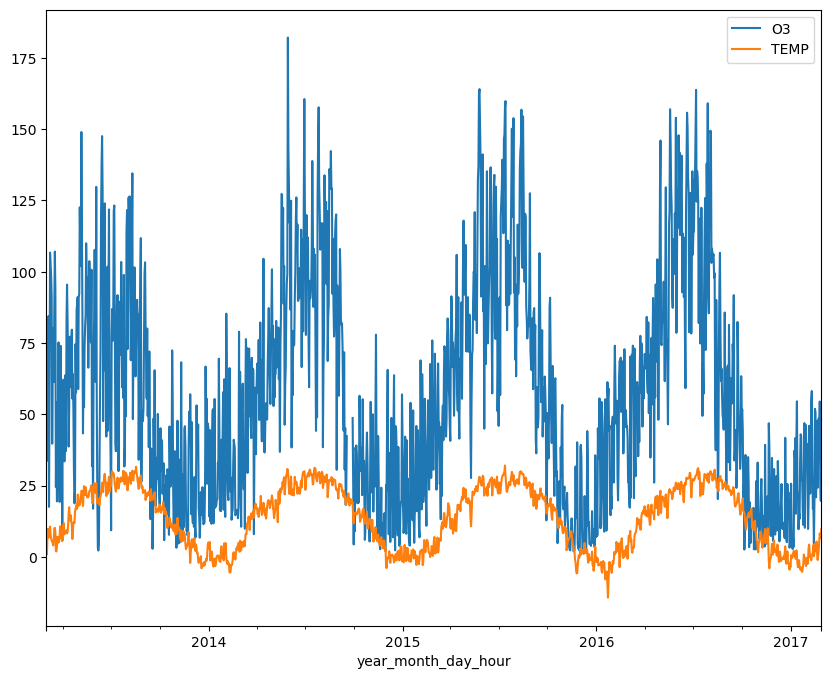

In [21]:
aq_df.set_index('year_month_day_hour').query("station=='Gucheng'")[['O3','TEMP']].plot()


station
Gucheng    Axes(0.125,0.11;0.775x0.77)
Shunyi     Axes(0.125,0.11;0.775x0.77)
Wanliu     Axes(0.125,0.11;0.775x0.77)
dtype: object

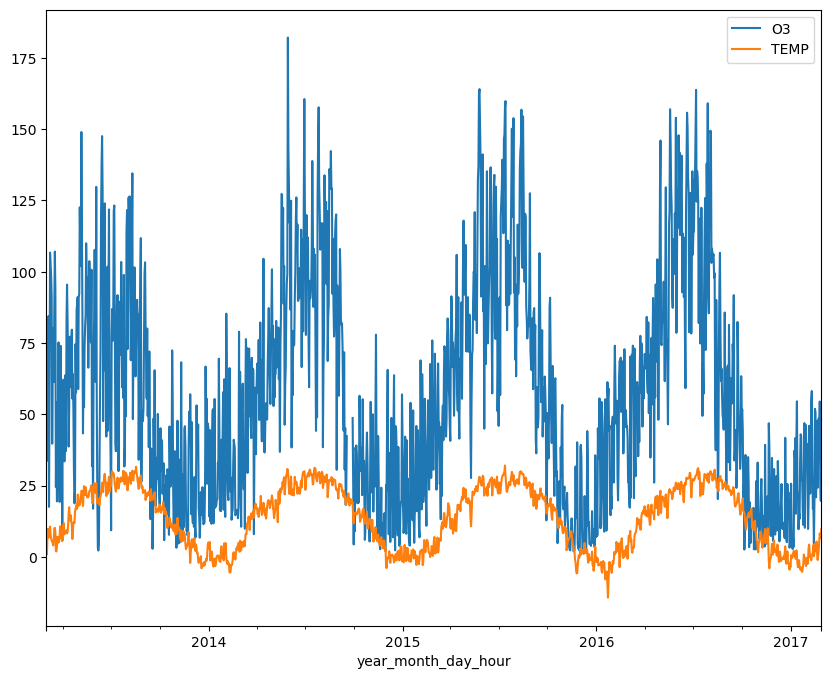

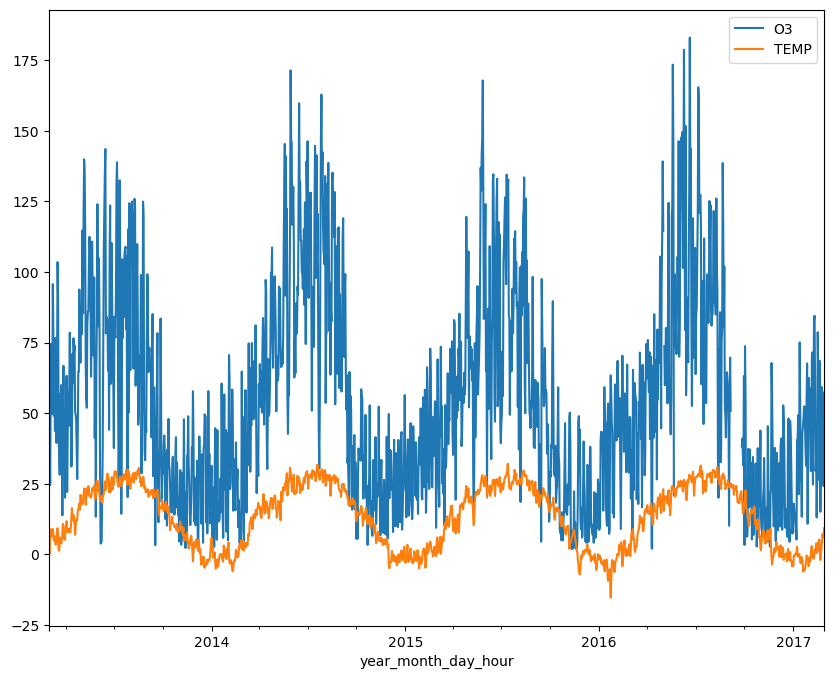

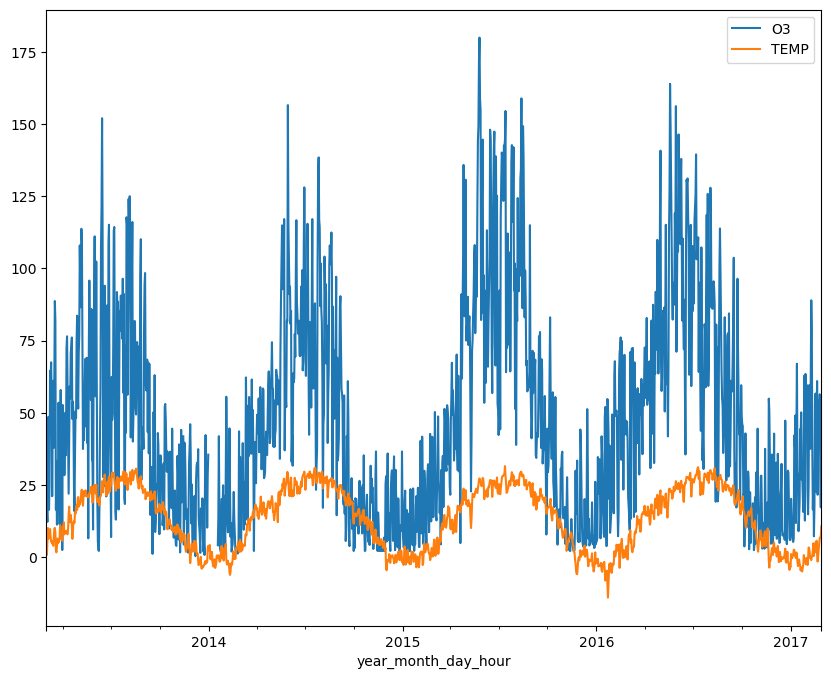

In [23]:
aq_df.set_index('year_month_day_hour').groupby('station')[['O3','TEMP']].plot()

In [24]:
aq_df

,station,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Gucheng,2013-03-01,8.625000,16.875000,7.391304,14.250000,869.565217,77.130435,1.691667,1024.816667,-19.691667,0.0,2.350000
1,Gucheng,2013-03-02,36.916667,51.375000,37.291667,37.565217,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500
2,Gucheng,2013-03-03,80.333333,120.041667,47.541667,63.333333,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000
3,Gucheng,2013-03-04,26.500000,51.291667,18.666667,32.666667,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667
4,Gucheng,2013-03-05,136.708333,172.541667,75.130435,73.500000,1381.545455,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,Wanliu,2017-02-24,21.458333,39.666667,8.750000,55.875000,837.500000,38.583333,4.395833,1019.466667,-10.583333,0.0,1.262500
4379,Wanliu,2017-02-25,8.250000,21.166667,6.375000,36.916667,491.666667,56.375000,6.387500,1017.287500,-9.900000,0.0,1.466667
4380,Wanliu,2017-02-26,27.125000,44.583333,14.250000,69.916667,887.500000,30.250000,6.720833,1018.758333,-7.558333,0.0,1.562500
4381,Wanliu,2017-02-27,64.000000,95.916667,17.869565,89.826087,1643.478261,17.136364,7.220833,1015.554167,-6.333333,0.0,1.316667


In [25]:
aq_df.station.unique()

array(['Gucheng', 'Shunyi', 'Wanliu'], dtype=object)

In [26]:
from prophet import Prophet

In [27]:
aq_df_final = aq_df[['year_month_day_hour', 'O3', 'TEMP', 'station']].rename({'year_month_day_hour':'ds', 'O3':'y'}, axis = 'columns')
                     

In [28]:
aq_df_final

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
...,...,...,...,...
4378,2017-02-24,38.583333,4.395833,Wanliu
4379,2017-02-25,56.375000,6.387500,Wanliu
4380,2017-02-26,30.250000,6.720833,Wanliu
4381,2017-02-27,17.136364,7.220833,Wanliu


In [29]:
stations = aq_df_final.groupby('station')

In [32]:
stations.head()

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
1461,2013-03-01,62.478261,0.541667,Shunyi
1462,2013-03-02,40.416667,0.083333,Shunyi
1463,2013-03-03,24.541667,5.029167,Shunyi
1464,2013-03-04,55.125000,8.937500,Shunyi
1465,2013-03-05,74.541667,6.450000,Shunyi


In [35]:
for station in stations.groups:
    group = stations.get_group(station)
    train = group[(group['ds'] >= '2013-03-01') & (group['ds'] <= '2016-02-28')]
    test = group[(group['ds'] > '2016-02-28')]
    print(test.shape)


(366, 4)
(366, 4)
(366, 4)


In [36]:
target = pd.DataFrame()

08:33:35 - cmdstanpy - INFO - Chain [1] start processing
08:33:35 - cmdstanpy - INFO - Chain [1] done processing
08:33:35 - cmdstanpy - INFO - Chain [1] start processing
08:33:35 - cmdstanpy - INFO - Chain [1] done processing
08:33:36 - cmdstanpy - INFO - Chain [1] start processing
08:33:36 - cmdstanpy - INFO - Chain [1] done processing


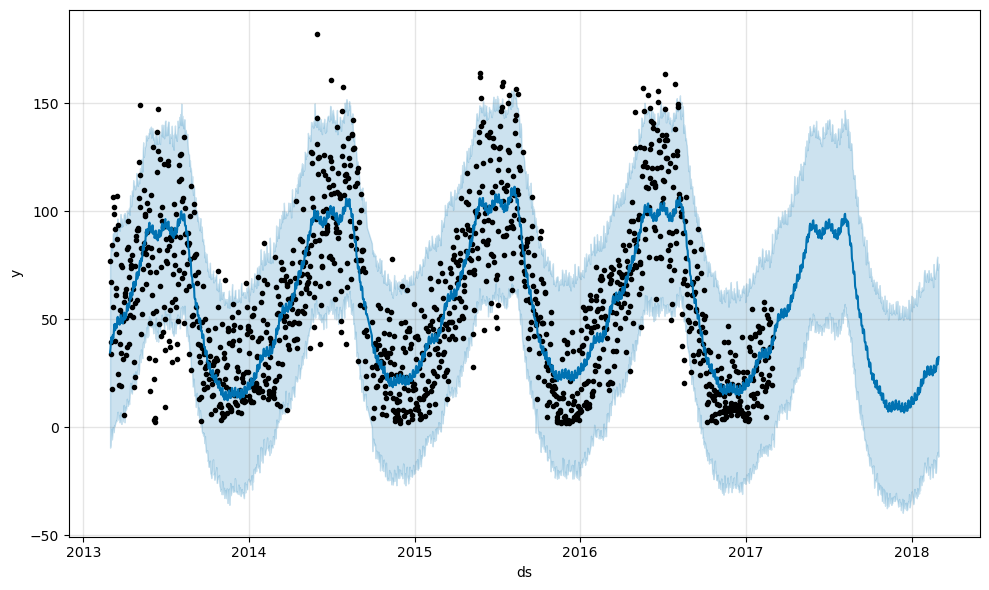

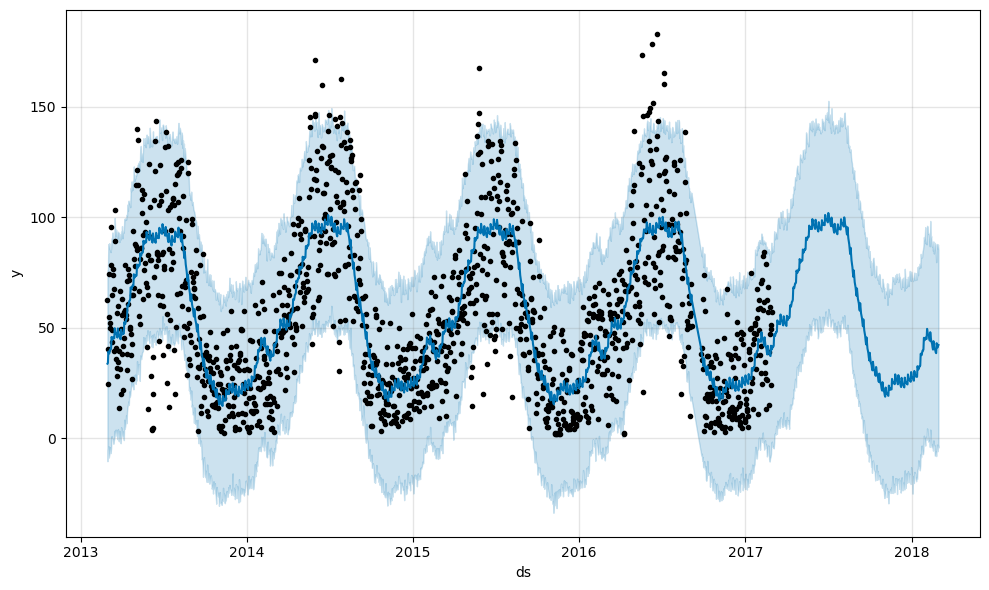

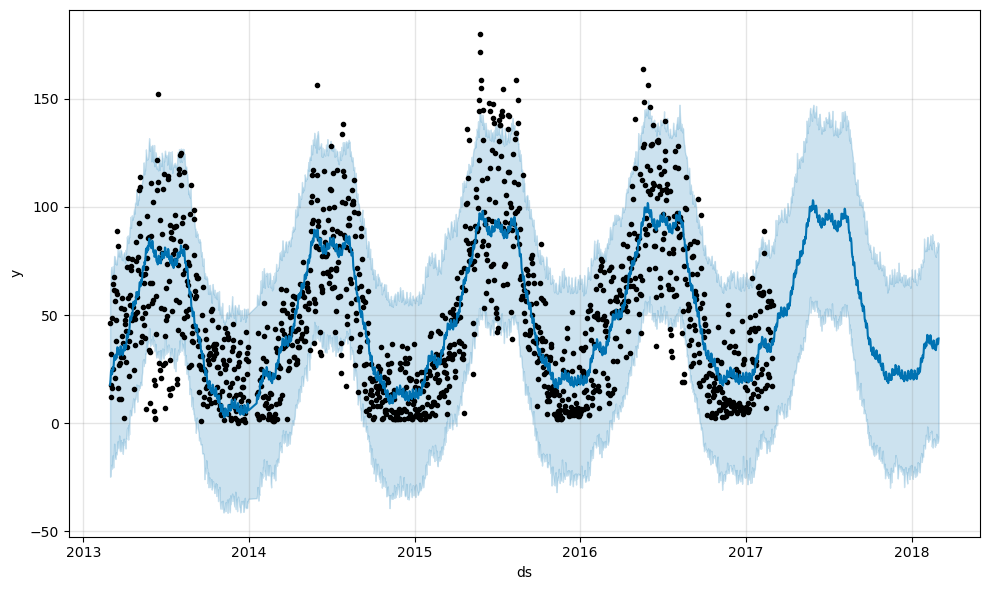

In [37]:
for station in stations.groups:
    group = stations.get_group(station)

    m = Prophet(interval_width = 0.95)
    m.fit(group)
    future = m.make_future_dataframe(periods = 366)
    forecast = m.predict(future)
    m.plot(forecast)
    forecast = forecast.rename(columns = {'yhat' : 'yhat_' + station})
    target = pd.merge(target, forecast.set_index('ds'), how = 'outer', left_index = True, right_index = True)

In [38]:
target

,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,weekly_x,weekly_lower_x,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_Wanliu
ds,,,,,,,,,,,,,,,,,,,,,
2013-03-01,49.800957,-9.509662,75.995357,49.800957,49.800957,-15.265729,-15.265729,-15.265729,-1.942289,-1.942289,...,-1.924980,-1.924980,-1.924980,-17.374247,-17.374247,-17.374247,0.0,0.0,0.0,17.703060
2013-03-02,49.808617,-8.510132,83.095987,49.808617,49.808617,-13.208918,-13.208918,-13.208918,-0.801706,-0.801706,...,-0.469691,-0.469691,-0.469691,-16.500469,-16.500469,-16.500469,0.0,0.0,0.0,20.044285
2013-03-03,49.816277,-4.717108,84.687496,49.816277,49.816277,-9.453169,-9.453169,-9.453169,2.014088,2.014088,...,2.407700,2.407700,2.407700,-15.565974,-15.565974,-15.565974,0.0,0.0,0.0,23.868329
2013-03-04,49.823936,-0.804319,85.127701,49.823936,49.823936,-8.210053,-8.210053,-8.210053,2.304762,2.304762,...,1.930742,1.930742,1.930742,-14.586016,-14.586016,-14.586016,0.0,0.0,0.0,24.383486
2013-03-05,49.831596,-5.719968,81.780490,49.831596,49.831596,-10.846284,-10.846284,-10.846284,-1.284876,-1.284876,...,-0.940616,-0.940616,-0.940616,-13.576841,-13.576841,-13.576841,0.0,0.0,0.0,22.533461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,45.592516,-12.945716,77.605424,42.449405,48.626087,-14.708380,-14.708380,-14.708380,2.014088,2.014088,...,2.407700,2.407700,2.407700,-20.125288,-20.125288,-20.125288,0.0,0.0,0.0,38.702629
2018-02-26,45.570566,-13.149471,78.918507,42.418793,48.614363,-13.709677,-13.709677,-13.709677,2.304762,2.304762,...,1.930742,1.930742,1.930742,-19.640150,-19.640150,-19.640150,0.0,0.0,0.0,38.714124
2018-02-27,45.548615,-11.464759,72.777987,42.388182,48.602638,-16.529178,-16.529178,-16.529178,-1.284876,-1.284876,...,-0.940616,-0.940616,-0.940616,-19.049480,-19.049480,-19.049480,0.0,0.0,0.0,36.436751


In [39]:
target = target[['yhat_' + station for station in stations.groups.keys()]]


In [40]:
target

,yhat_Gucheng,yhat_Shunyi,yhat_Wanliu
ds,,,
2013-03-01,34.535228,33.784259,17.703060
2013-03-02,36.599699,34.121603,20.044285
2013-03-03,40.363107,39.285721,23.868329
2013-03-04,41.613884,38.756824,24.383486
2013-03-05,38.985312,38.407936,22.533461
...,...,...,...
2018-02-25,30.884136,43.058885,38.702629
2018-02-26,31.860889,41.955217,38.714124
2018-02-27,29.019437,41.109889,36.436751


<Axes: xlabel='ds'>

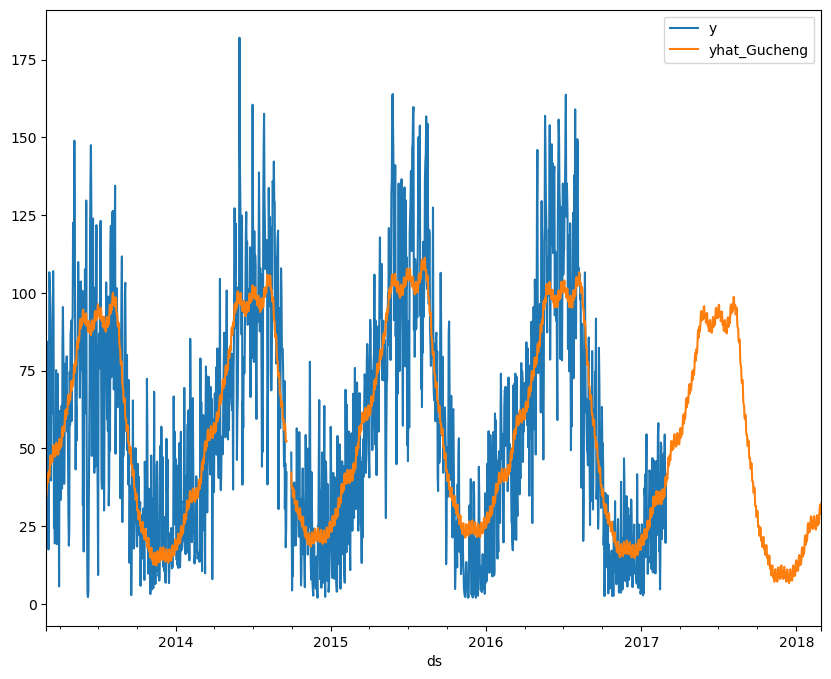

In [41]:
pd.concat([aq_df_final.set_index('ds').query("station=='Gucheng'")['y'],target['yhat_Gucheng']],axis=1).plot()


<Axes: xlabel='ds'>

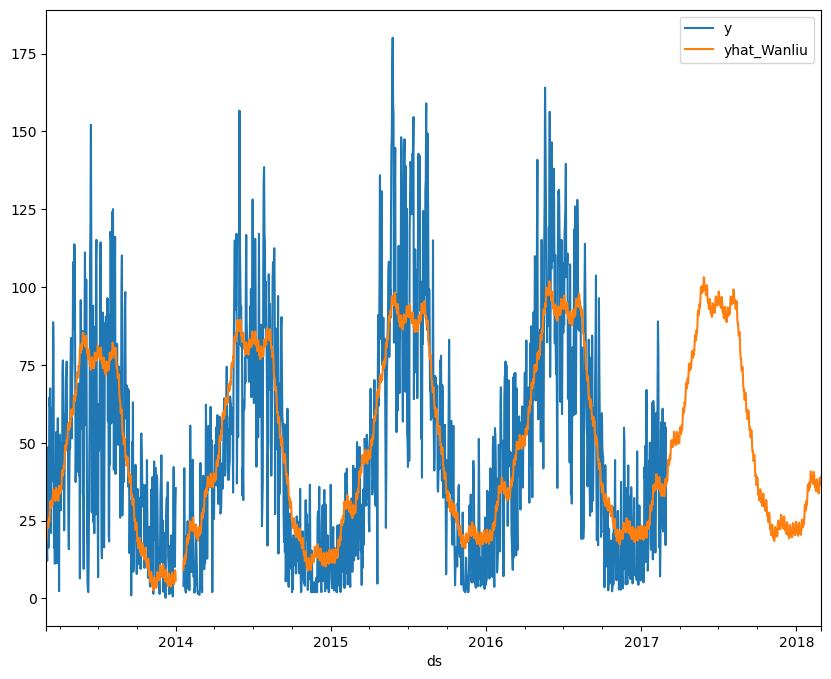

In [42]:
pd.concat([aq_df_final.set_index('ds').query("station=='Wanliu'")['y'],target['yhat_Wanliu']],axis=1).plot()
